# Lab 2: Semantic Similarity Using WordNet

I am running Python 3.10.12  Which version are you running?

In [2]:
!python --version

Python 3.10.12


## 1. Getting Started

If you haven't used nltk before, you will need to run the following cell and download resources.  You will need:

*   wordnet
*   wordnet_ic
*   omw-1.4


In [3]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wn_ic

## 2 Useful WN Functions

Look at the code in the cells below.  Write notes as to what is being returned.

In [4]:
wn.synsets("book")

[Synset('book.n.01'),
 Synset('book.n.02'),
 Synset('record.n.05'),
 Synset('script.n.01'),
 Synset('ledger.n.01'),
 Synset('book.n.06'),
 Synset('book.n.07'),
 Synset('koran.n.01'),
 Synset('bible.n.01'),
 Synset('book.n.10'),
 Synset('book.n.11'),
 Synset('book.v.01'),
 Synset('reserve.v.04'),
 Synset('book.v.03'),
 Synset('book.v.04')]

a list of all of the Synsets which contain the word 'book' i.e., all of its senses.



In [5]:
len(wn.synsets("book"))

15

How many synsets the word form "book" appears in - the length of the list of all of its synsets

In [5]:
wn.synsets("book", wn.ADV)

[]

In [6]:
asynset=wn.synsets("book",wn.NOUN)[1]
asynset.definition()

'physical objects consisting of a number of pages bound together'

In [7]:
asynset.hyponyms()

[Synset('coffee-table_book.n.01'),
 Synset('folio.n.03'),
 Synset('sketchbook.n.01'),
 Synset('novel.n.02'),
 Synset('journal.n.04'),
 Synset('paperback_book.n.01'),
 Synset('hardback.n.01'),
 Synset('order_book.n.02'),
 Synset('picture_book.n.01'),
 Synset('album.n.02'),
 Synset('notebook.n.01')]

In [8]:
asynset.hypernyms()

[Synset('product.n.02')]

In [9]:
asynset.hypernyms()[0].hyponyms()


[Synset('magazine.n.02'),
 Synset('book.n.02'),
 Synset('book.n.11'),
 Synset('inspiration.n.02'),
 Synset('deliverable.n.01'),
 Synset('by-product.n.02'),
 Synset('work.n.02'),
 Synset('output.n.05'),
 Synset('yield.n.03'),
 Synset('movie.n.01'),
 Synset('newspaper.n.03'),
 Synset('end_product.n.01'),
 Synset('turnery.n.02'),
 Synset('job.n.04')]

In [10]:
brown_ic=wn_ic.ic('ic-brown.dat')
asynset.lin_similarity(asynset.hypernyms()[0].hyponyms()[8],brown_ic)

0.6062360082744072

# 2.1 Q1
Write a function to return the path similarity of two nouns.  Remember this is the maximum similarity of all of the possible pairings of the two nouns.  Make sure you test it.  For (chicken, car) the correct answer is 0.0909 (to 3 SF).

# 2.1 Q2
Generalise your function so that you have an extra (optional) parameter which you can use to select the WordNet similarity measure e.g., res_similarity and lin_similarity.  Make sure you test it.  For the pair (chicken,car), the correct answer for res_similarity is 1.53 (to 3SF) and the correct answer for lin_similarity is 0.179


One of many possible solutions.  The use of itertools.product and a list comprehension is just one way of getting all of the possible similarities - using a doubly nested loop is equally acceptable.

In [14]:
from itertools import product 
brown_ic=wn_ic.ic('ic-brown.dat')

def calcsim(s1,s2,metric):
    sim=None
    if metric == "path":
        sim=s1.path_similarity(s2)
    elif metric == "res":
        sim=s1.res_similarity(s2,brown_ic)
    elif metric == "lin":
        sim=s1.lin_similarity(s2,brown_ic)
        
    if isinstance(sim,float):
        return sim
    else:
        return 0

def wnsimilarity(w1,w2,metric='path'):
    synsets1=wn.synsets(w1,wn.NOUN)
    synsets2=wn.synsets(w2,wn.NOUN)
    #sims=[calcsim(s1,s2,metric) for s1,s2 in product(synsets1,synsets2)]
    sims=[]
    for s1 in synsets1:
        for s2 in synsets2:
            sims.append(calcsim(s1,s2,metric))
            
    return max(sims)

wnsimilarity("car","chicken",metric="lin")

0.17900106582025765

In [15]:
# just demonstrating iterating over the product of two lists

synsets1=wn.synsets("car",wn.NOUN)
synsets2=wn.synsets("chicken",wn.NOUN)
for item in product(synsets1,synsets2):
    print(item)

(Synset('car.n.01'), Synset('chicken.n.01'))
(Synset('car.n.01'), Synset('chicken.n.02'))
(Synset('car.n.01'), Synset('wimp.n.01'))
(Synset('car.n.01'), Synset('chicken.n.04'))
(Synset('car.n.02'), Synset('chicken.n.01'))
(Synset('car.n.02'), Synset('chicken.n.02'))
(Synset('car.n.02'), Synset('wimp.n.01'))
(Synset('car.n.02'), Synset('chicken.n.04'))
(Synset('car.n.03'), Synset('chicken.n.01'))
(Synset('car.n.03'), Synset('chicken.n.02'))
(Synset('car.n.03'), Synset('wimp.n.01'))
(Synset('car.n.03'), Synset('chicken.n.04'))
(Synset('car.n.04'), Synset('chicken.n.01'))
(Synset('car.n.04'), Synset('chicken.n.02'))
(Synset('car.n.04'), Synset('wimp.n.01'))
(Synset('car.n.04'), Synset('chicken.n.04'))
(Synset('cable_car.n.01'), Synset('chicken.n.01'))
(Synset('cable_car.n.01'), Synset('chicken.n.02'))
(Synset('cable_car.n.01'), Synset('wimp.n.01'))
(Synset('cable_car.n.01'), Synset('chicken.n.04'))


## 3 Human Synonymy Judgments

### 3.1
Read in mcdata.csv and store it in an appropriate format so that you can obtain a list of pairs of the nouns and the score associated with each pair.


Again, many ways to complete this one.  I would encourage the use of the csv package (either with dialect = 'excel' or the delimiter and quotechar explicitly set) to avoid future problems when reading csv files which have commas in the fields.  Pandas is a good choice here and will make the correlations easier later (but just storing a list of triples (i.e., mcdata in the code below) is fine too).

In [16]:
#from google.colab import drive
#drive.mount('/content/drive')


In [17]:
import csv, os, pandas as pd
#path='/content/drive/My Drive/AdvNLP'
path=''
filename=os.path.join(path,"mcdata.csv")
with open(filename) as instream:
    mcdata=list(csv.reader(instream,dialect='excel'))


df=pd.DataFrame(mcdata,columns=["word1","word2","human similarity"])
df



,word1,word2,human similarity
0,asylum,madhouse,3.61
1,bird,cock,3.05
2,bird,crane,2.97
3,boy,lad,3.76
4,brother,monk,2.82
5,car,automobile,3.92
6,cemetery,woodland,0.95
7,chord,smile,0.13
8,coast,forest,0.42
9,coast,hill,0.87


In [18]:
df.describe()

,word1,word2,human similarity
count,30,30,30
unique,23,26,26
top,coast,wizard,0.08
freq,3,2,2


In [19]:
#this doesn't actually look any different but means that the similarity scores are treated as floats rather than strings - which is very useful later
df['human similarity']=df['human similarity'].map(float)
df

,word1,word2,human similarity
0,asylum,madhouse,3.61
1,bird,cock,3.05
2,bird,crane,2.97
3,boy,lad,3.76
4,brother,monk,2.82
5,car,automobile,3.92
6,cemetery,woodland,0.95
7,chord,smile,0.13
8,coast,forest,0.42
9,coast,hill,0.87


In [20]:
df.describe()

,human similarity
count,30.000000
mean,1.929000
std,1.419979
min,0.080000
25%,0.682500
50%,1.670000
75%,3.342500
max,3.920000


### 3.2

Calculate the similarity score for each pair of nouns using at least 2 semantic similarity measures.

In [17]:
#just checking format of mcdata

mcdata

[['asylum', 'madhouse', '3.61'],
 ['bird', 'cock', '3.05'],
 ['bird', 'crane', '2.97'],
 ['boy', 'lad', '3.76'],
 ['brother', 'monk', '2.82'],
 ['car', 'automobile', '3.92'],
 ['cemetery', 'woodland', '0.95'],
 ['chord', 'smile', '0.13'],
 ['coast', 'forest', '0.42'],
 ['coast', 'hill', '0.87'],
 ['coast', 'shore', '3.7'],
 ['crane', 'implement', '1.68'],
 ['food', 'fruit', '3.08'],
 ['food', 'rooster', '0.89'],
 ['forest', 'graveyard', '0.84'],
 ['furnace', 'stove', '3.11'],
 ['gem', 'jewel', '3.84'],
 ['glass', 'magician', '0.11'],
 ['journey', 'car', '1.16'],
 ['journey', 'voyage', '3.84'],
 ['lad', 'brother', '1.66'],
 ['lad', 'wizard', '0.42'],
 ['magician', 'wizard', '3.5'],
 ['midday', 'noon', '3.42'],
 ['monk', 'oracle', '1.1'],
 ['monk', 'slave', '0.55'],
 ['noon', 'string', '0.08'],
 ['rooster', 'voyage', '0.08'],
 ['shore', 'woodland', '0.63'],
 ['tool', 'implement', '1.68']]

In [21]:
measures=["path","res","lin"]
for measure in measures:
    scores=[]

    for i,triple in enumerate(mcdata):
        scores.append(wnsimilarity(triple[0],triple[1],metric=measure))
    df[measure]=scores
    
df

,word1,word2,human similarity,path,res,lin
0,asylum,madhouse,3.61,0.500000,9.475167,0.855584
1,bird,cock,3.05,0.500000,7.677755,0.773937
2,bird,crane,2.97,0.250000,7.677755,0.747812
3,boy,lad,3.76,0.500000,8.399492,0.830562
4,brother,monk,2.82,0.500000,9.261593,0.986407
5,car,automobile,3.92,1.000000,7.591401,1.000000
6,cemetery,woodland,0.95,0.111111,1.290026,0.123441
7,chord,smile,0.13,0.090909,2.619644,0.246256
8,coast,forest,0.42,0.166667,1.290026,0.130646
9,coast,hill,0.87,0.200000,5.884681,0.599113


### 3.3
Correlate each of the calculated sets of scores with each other and with the human judgements (I suggest you use scipy.stats.spearmanr() or pandas for this).

I haven't actually asked for a scatter plot but it is always good to generate one when thinking about correlation.

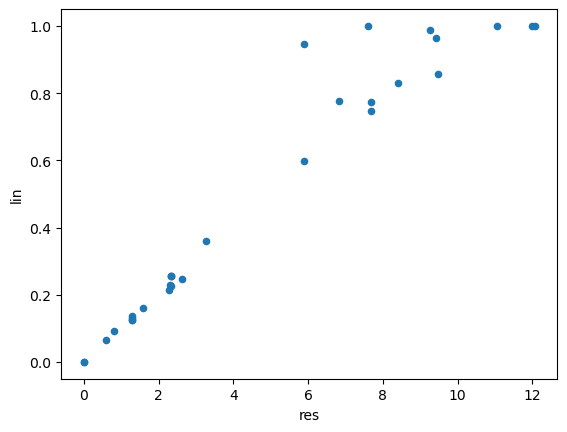

In [22]:
#%matplotlib inline  
#might need this somewhere so the plots are generated in the notebook if using older versions of jupyter, not needed in colab or newer versions of jupyter

x="res"
y="lin"
def draw_scatter(x,y):

    df[x]=df[x].map(float)
    df[y]=df[y].map(float)
    
    df.plot.scatter(x,y)
draw_scatter(x,y)

In [23]:
df.corr(method='spearman',numeric_only=True)

,human similarity,path,res,lin
human similarity,1.000000,0.722743,0.735945,0.753510
path,0.722743,1.000000,0.900648,0.945509
res,0.735945,0.900648,1.000000,0.962707
lin,0.753510,0.945509,0.962707,1.000000


### 3.4

What do you conclude?


* Correlation is generally high / low?
* Highest correlation is between ....
* Highest correlation between a wordnet measure and human synonymy judgements is for ...
* Differences are small / large?  Are they significant?  Think about size of sample

## 4 Distributional Similarity

We are going to be using some pre-computed Word2Vec embeddings.  We will be learning about how these are computed in a few weeks time.  For now, you can assume they in some way capture the notion of distributional similarity discussed in this week's class: words which are used in similar ways will have similar vectors in this space.  You can download the embeddings here:

https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

Note this is a very large file: 1.65GB zipped

Or, if working on a lab computer, you can use the following full path:

mac: /Volumes/teaching/Departments/Informatics/AdvancedNLP/GoogleNews-vectors-negative300.bin

windows: //ad.susx.ac.uk/ITS/Teaching/Departments/Informatics/AdvancedNLP/GoogleNews-vectors-negative300.bin


You should now be able to load them in to python using the following code (it may take a while to run this).  If working on a mac or your own machine, you may need to use conda or pip to install the gensim package into your environment.


In [24]:
from gensim.models import KeyedVectors

In [25]:
#this cell may take a minute or more to run as it is loading a large model into memory
#avoid re-running it unnecessarily
filename=os.path.join(path,"GoogleNews-vectors-negative300.bin")
mymodel =KeyedVectors.load_word2vec_format(filename,binary=True)

You can now query the model with calls to methods of mymodel as in the cells below.  Take time to think about what each call is doing and try some similar queries of your own.

In [26]:
mymodel.similarity('car','chicken')

0.11331679

In [27]:
#this cell may crash your session on the basic CoLab as you might run out of RAM.
#You probably need to be working on Anaconda on a reasonably powerful machine or have Colab Pro
mymodel.most_similar(positive=['man'])

[('woman', 0.7664012908935547),
 ('boy', 0.6824870705604553),
 ('teenager', 0.6586930751800537),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.5716364979743958),
 ('robber', 0.5585118532180786),
 ('Robbery_suspect', 0.5584409832954407),
 ('teen_ager', 0.5549197196960449),
 ('men', 0.5489763021469116)]

In [28]:
mymodel.similarity('noon','string')

0.021654516

In [29]:
mymodel['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

## 4.1
Repeat the tasks in Section 3 using similarity scores from the word2vec model.  Make sure you correlate the word2vec similarities with the human synonymy judgements and the wordnet similarity scores.  What do you conclude?

In [30]:
scores=[]
for i,triple in enumerate(mcdata):
    scores.append(mymodel.similarity(triple[0],triple[1]))
df["word2vec"]=scores
    
df

,word1,word2,human similarity,path,res,lin,word2vec
0,asylum,madhouse,3.61,0.500000,9.475167,0.855584,0.252539
1,bird,cock,3.05,0.500000,7.677755,0.773937,0.362902
2,bird,crane,2.97,0.250000,7.677755,0.747812,0.302862
3,boy,lad,3.76,0.500000,8.399492,0.830562,0.588616
4,brother,monk,2.82,0.500000,9.261593,0.986407,0.223200
5,car,automobile,3.92,1.000000,7.591401,1.000000,0.583837
6,cemetery,woodland,0.95,0.111111,1.290026,0.123441,0.381925
7,chord,smile,0.13,0.090909,2.619644,0.246256,0.148692
8,coast,forest,0.42,0.166667,1.290026,0.130646,0.236098
9,coast,hill,0.87,0.200000,5.884681,0.599113,0.161158


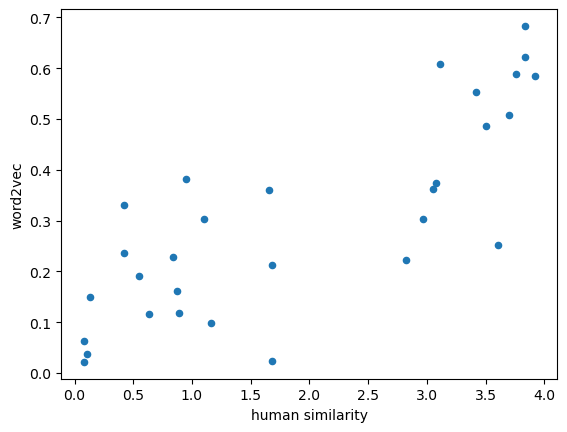

In [31]:

x="human similarity"
y="word2vec"
def draw_scatter(x,y):

    df[x]=df[x].map(float)
    df[y]=df[y].map(float)
    
    df.plot.scatter(x,y)
draw_scatter(x,y)

In [32]:
df.corr(method='spearman',numeric_only=True)

,human similarity,path,res,lin,word2vec
human similarity,1.000000,0.722743,0.735945,0.753510,0.786557
path,0.722743,1.000000,0.900648,0.945509,0.582529
res,0.735945,0.900648,1.000000,0.962707,0.573820
lin,0.753510,0.945509,0.962707,1.000000,0.586323
word2vec,0.786557,0.582529,0.573820,0.586323,1.000000


### 4.2
* Which measure has the highest correlation with human synonymy judgements now?

## 5 Extension
See the pdf for instructions.


I don't expect many students to get onto this.   However, some might - especially if they have reused functions for wordnet similarity that they created during AppliedNLP and / or are very keen / interested in the statistical significance aspects.

First, make a scatter plot for different pairs of variables.  See above for basic example using pandas.  However, here I am going to use seaborn because it is really easy to plot the regression line.

I am just going to work through the word2vec vs human similarity case but obviously it can be done with any of the pairs of measures.


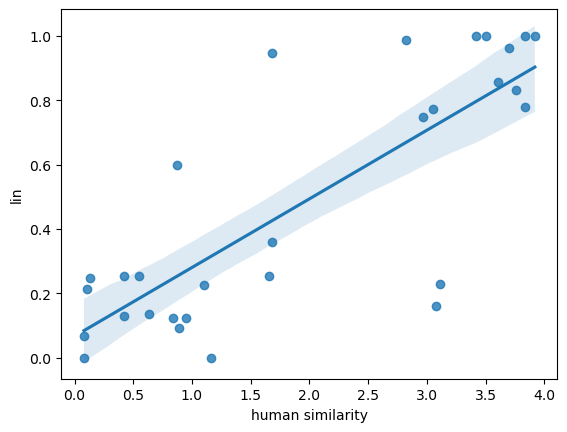

In [33]:
import seaborn as sns
x="human similarity"
y="lin"
def draw_scatter(x,y):
    #probably don't need to map to float if this has already been done elsewhere - doesn't hurt though, just in case!
    df[x]=df[x].map(float)
    df[y]=df[y].map(float)
    
    sns.regplot(x=df[x],y=df[y])
draw_scatter(x,y)

Correlation coefficients with p-values can be calculated using scipy.stats (spearmanr is better than pearsonr for this type of data - why?)

In [34]:
import scipy.stats as stats
stats.spearmanr(df[x],df[y])

SignificanceResult(statistic=0.7535104398162412, pvalue=1.537645680941842e-06)

Whilst not essential, worth knowing that you can add text to a graph by using the text() method.  Also, use the string formatting functions to sort out the number of decimal places displayed.

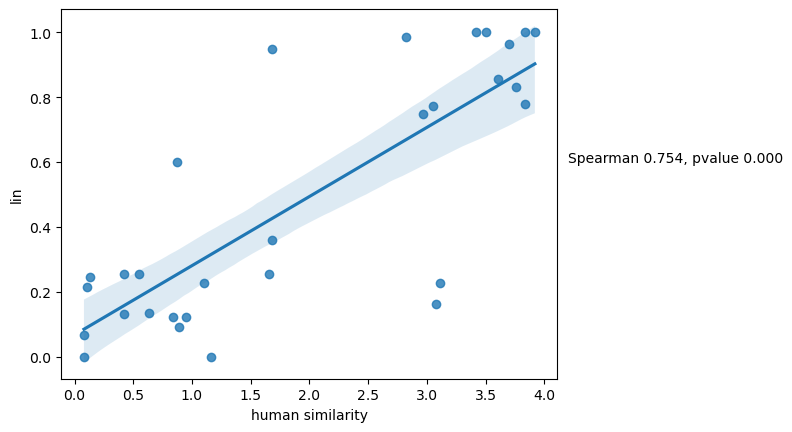

In [35]:

x="human similarity"
y="lin"
def draw_scatter(x,y):

    df[x]=df[x].map(float)
    df[y]=df[y].map(float)
    
    ax=sns.regplot(x=df[x],y=df[y])
    
    r,p=stats.spearmanr(df[x],df[y])
    ax.text(4.2, 0.6, "Spearman {:.3f}, pvalue {:.3f}".format(r,p))
draw_scatter(x,y)

The pvalue tells us the probability of getting this correlation coefficient if there was really no correlation between the two variables.  This probability is very small (<< 0.1%) so it is definitely "significant" - but that is significantly greater than zero.  It does not tell us anything about the difference between 2 correlation coefficients (is 0.786 significantly greater than 0.75?)

### 5.3

The correlation coefficient calculated with stats.linregress() is Pearson's product-moment, but it does tell us the slope and intercept of the line of best fit.  I have also added this as text next to the graph.

In [36]:
stats.linregress(df[x],df[y])

LinregressResult(slope=0.21316693388842692, intercept=0.0671859303046985, rvalue=0.803644338083903, pvalue=8.923071661975858e-08, stderr=0.029831431858643655, intercept_stderr=0.07103495982988774)

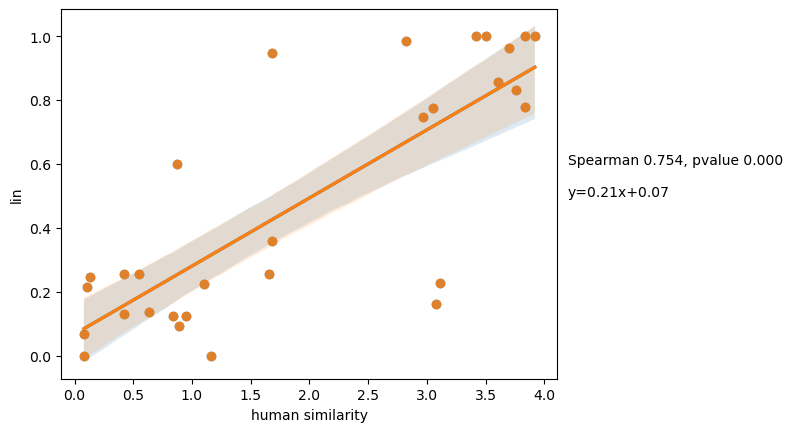

In [37]:
import seaborn as sns

def draw_scatter(x,y):

    df[x]=df[x].map(float)
    df[y]=df[y].map(float)
    
    ax=sns.regplot(x=df[x],y=df[y])
    r,p=stats.spearmanr(df[x],df[y])
    ax.text(4.2, 0.6, "Spearman {:.3f}, pvalue {:.3f}".format(r,p))
    
    (m,c,_r,_p,_s)=stats.linregress(df[x],df[y])
    text="y={:.2f}x+{:.2f}".format(m,c)
    ax.text(4.2, 0.5, text)
    
    sns.regplot(x=df[x], y=df[y])

    
draw_scatter(x,y)

### 5.4  basic bootstrapping
Here, I use numpy.random to (repeatedly) create a random sample (with replacement) of the word pairs.  I then look up the appropriate similarity scores from the dataframe.  I calculate the correlation for each sample and store it in a list of correlations.  I sort the list and then find the appropriate percentiles in that list for the confidence interval required.

In [38]:
x="human similarity"
y="word2vec"

from numpy.random import choice
import math
n=len(mcdata)
repeats=20000
interval=95
indices=range(0,len(mcdata))


correlation_list=[]
for i in range(0,repeats):
    sample = choice(indices,n)    
    scores_x=[df[x][j] for j in sample]
    scores_y=[df[y][j] for j in sample]
    correlation_list.append(stats.spearmanr(scores_x,scores_y)[0])

    
sorted_list=sorted(correlation_list)
p=(100-interval)/2
index1=math.floor(p*repeats/100)
index2=repeats-index1

lower=sorted_list[index1]
upper=sorted_list[index2]

print("{}% confidence interval for Spearmanr between {} and {} y: [{:.2f},{:.2f}]".format(interval,x,y,lower, upper))


95% confidence interval for Spearmanr between human similarity and word2vec y: [0.55,0.91]


Even without calculating confidence intervals for the other measures, we can see that they will overlap.  Therefore, the differences between the correlation coefficients are not statistically significant at the 95% level.